<a href="https://colab.research.google.com/github/sagarbhadra7/Python-Programs/blob/master/Banking_Interest_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [0]:
df_train = pd.read_csv("C:\\Users\\sagar\\Downloads\\Hackathon\\BAnking\\train.csv")
df_test = pd.read_csv("C:\\Users\\sagar\\Downloads\\Hackathon\\BAnking\\test.csv")

# Convert to numeric
df_train["Loan_Amount_Requested"] = df_train["Loan_Amount_Requested"].str.replace(",", "")
df_train["Loan_Amount_Requested"] = pd.to_numeric(df_train["Loan_Amount_Requested"])
df_test["Loan_Amount_Requested"] = df_test["Loan_Amount_Requested"].str.replace(",", "")
df_test["Loan_Amount_Requested"] = pd.to_numeric(df_test["Loan_Amount_Requested"])

# Fill NaN
df_train["Length_Employed"].fillna('NaN', inplace=True)
df_test["Length_Employed"].fillna('NaN', inplace=True)

df_train["Home_Owner"].fillna('NaN', inplace=True)
df_test["Home_Owner"].fillna('NaN', inplace=True)

df_train["Income_Verified"].fillna('NaN', inplace=True)
df_test["Income_Verified"].fillna('NaN', inplace=True)

df_train["Purpose_Of_Loan"].fillna('NaN', inplace=True)
df_test["Purpose_Of_Loan"].fillna('NaN', inplace=True)

df_train["Gender"].fillna('NaN', inplace=True)
df_test["Gender"].fillna('NaN', inplace=True)

# Drop loan ids
df_train = df_train.drop(["Loan_ID"], axis=1)
loan_ids = df_test["Loan_ID"].values
df_test = df_test.drop(["Loan_ID"], axis=1)

# Fill NaN with mean
df_train["Annual_Income"].fillna(df_train["Annual_Income"].mean(), inplace=True)
df_test["Annual_Income"].fillna(df_test["Annual_Income"].mean(), inplace=True)

# Assumption: If it is NaN, then user has no deliquency, so set with 0
df_train["Months_Since_Deliquency"].fillna(0, inplace=True)
df_test["Months_Since_Deliquency"].fillna(0, inplace=True)

# New feature
df_train["Number_Invalid_Acc"] = df_train["Total_Accounts"] - df_train["Number_Open_Accounts"]
df_test["Number_Invalid_Acc"] = df_test["Total_Accounts"] - df_test["Number_Open_Accounts"]

# New feature
df_train["Number_Years_To_Repay_Debt"] = df_train["Loan_Amount_Requested"]/df_train["Annual_Income"]
df_test["Number_Years_To_Repay_Debt"] = df_test["Loan_Amount_Requested"]/df_test["Annual_Income"]

df_train.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Number_Invalid_Acc,Number_Years_To_Repay_Debt
0,7000,< 1 year,Rent,68000.000000,not verified,car,18.37,0,0.0,9,14,Female,1,5,0.102941
1,30000,4 years,Mortgage,73331.159434,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3,12,0.409103
2,24725,7 years,Mortgage,75566.400000,VERIFIED - income source,debt_consolidation,15.88,0,0.0,12,16,Male,3,4,0.327196
3,16000,< 1 year,NaN,56160.000000,VERIFIED - income source,debt_consolidation,14.34,3,0.0,16,22,Male,3,6,0.284900
4,17000,8 years,Own,96000.000000,VERIFIED - income source,debt_consolidation,22.17,1,0.0,19,30,Female,1,11,0.177083


In [0]:
X_train, Y = df_train.drop(["Interest_Rate"], axis=1).values, df_train["Interest_Rate"].values
X_test = df_test.values

X_train.shape, Y.shape, X_test.shape

((164309, 14), (164309,), (109541, 14))

In [0]:

model = CatBoostClassifier(random_state=27, task_type="GPU", devices="0:1", n_estimators=1000, max_depth=4, verbose=500)
model.fit(X_train, Y, cat_features=[1, 2, 4, 5, 11])
preds1 = model.predict_proba(X_test)

Learning rate set to 0.183772
0:	learn: 1.0665953	total: 55.6ms	remaining: 55.6s
500:	learn: 0.9030256	total: 23.8s	remaining: 23.7s
999:	learn: 0.8909036	total: 47.2s	remaining: 0us


In [0]:
model = CatBoostClassifier(random_state=27, task_type="GPU", devices="0:1", n_estimators=4000, max_depth=4, verbose=500)
model.fit(X_train, Y, cat_features=[1, 2, 4, 5, 11])
preds3 = model.predict_proba(X_test)

Learning rate set to 0.057911
0:	learn: 1.0878263	total: 53.7ms	remaining: 3m 34s
500:	learn: 0.9159457	total: 23.9s	remaining: 2m 46s
1000:	learn: 0.9087074	total: 47.6s	remaining: 2m 22s
1500:	learn: 0.9034885	total: 1m 10s	remaining: 1m 58s
2000:	learn: 0.8991805	total: 1m 34s	remaining: 1m 34s
2500:	learn: 0.8951656	total: 1m 58s	remaining: 1m 10s
3000:	learn: 0.8915029	total: 2m 21s	remaining: 47.2s
3500:	learn: 0.8881186	total: 2m 46s	remaining: 23.7s
3999:	learn: 0.8848156	total: 3m 13s	remaining: 0us


In [0]:
print(preds1)

[[0.15754547 0.42092972 0.42152481]
 [0.55110534 0.36405615 0.08483852]
 [0.1345278  0.41153643 0.45393577]
 ...
 [0.26840052 0.51688356 0.21471592]
 [0.05789684 0.31358508 0.62851808]
 [0.18586446 0.4548043  0.35933124]]


In [0]:
sample=pd.read_csv('C:\\Users\\sagar\\Downloads\\Hackathon\\BAnking\\sample_submission.csv')
sample.drop(['Interest_Rate'],axis=1,inplace=True)
y_pred=pd.DataFrame(preds1)
y_pred.rename(columns={0:"Interest_Rate"},inplace=True)
sample=pd.concat([sample,y_pred],axis='columns')
sample.head()
sample.to_csv('C:\\Users\\sagar\\Downloads\\Hackathon\\BAnking\\sub1.csv',index=False)

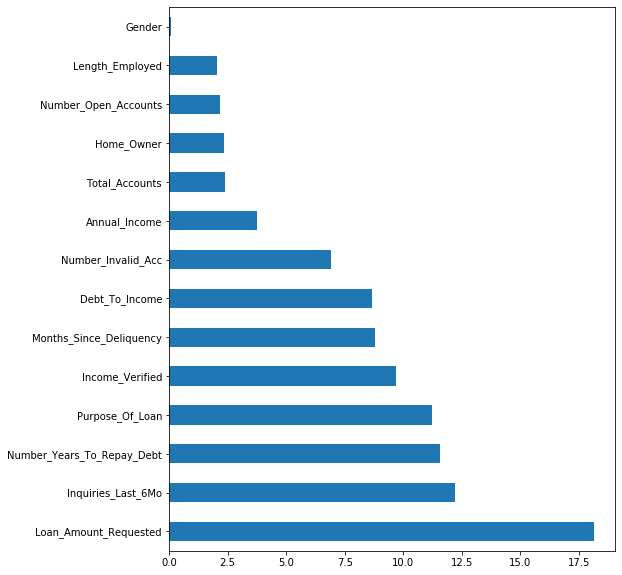

In [0]:
feat_imp = pd.Series(model.feature_importances_, index=df_train.drop(["Interest_Rate"], axis=1).columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

In [0]:
df_train = pd.read_csv("C:\\Users\\sagar\\Downloads\\Hackathon\\BAnking\\train.csv")
df_test = pd.read_csv("C:\\Users\\sagar\\Downloads\\Hackathon\\BAnking\\test.csv")

# Convert to numeric
df_train["Loan_Amount_Requested"] = df_train["Loan_Amount_Requested"].str.replace(",", "")
df_train["Loan_Amount_Requested"] = pd.to_numeric(df_train["Loan_Amount_Requested"])
df_test["Loan_Amount_Requested"] = df_test["Loan_Amount_Requested"].str.replace(",", "")
df_test["Loan_Amount_Requested"] = pd.to_numeric(df_test["Loan_Amount_Requested"])

# Fill NaN
df_train["Length_Employed"].fillna('NaN', inplace=True)
df_test["Length_Employed"].fillna('NaN', inplace=True)

df_train["Home_Owner"].fillna('NaN', inplace=True)
df_test["Home_Owner"].fillna('NaN', inplace=True)

df_train["Purpose_Of_Loan"].fillna('NaN', inplace=True)
df_test["Purpose_Of_Loan"].fillna('NaN', inplace=True)

df_train["Gender"].fillna('NaN', inplace=True)
df_test["Gender"].fillna('NaN', inplace=True)

# Drop loan ids
df_train = df_train.drop(["Loan_ID"], axis=1)
loan_ids = df_test["Loan_ID"].values
df_test = df_test.drop(["Loan_ID"], axis=1)

# Label Encode
le = LabelEncoder()
df_train["Length_Employed"] = le.fit_transform(df_train["Length_Employed"])
df_test["Length_Employed"] = le.transform(df_test["Length_Employed"])

df_train["Home_Owner"] = le.fit_transform(df_train["Home_Owner"])
df_test["Home_Owner"] = le.transform(df_test["Home_Owner"])

df_train["Income_Verified"] = le.fit_transform(df_train["Income_Verified"])
df_test["Income_Verified"] = le.transform(df_test["Income_Verified"])

df_train["Purpose_Of_Loan"] = le.fit_transform(df_train["Purpose_Of_Loan"])
df_test["Purpose_Of_Loan"] = le.transform(df_test["Purpose_Of_Loan"])

df_train["Gender"] = le.fit_transform(df_train["Gender"])
df_test["Gender"] = le.transform(df_test["Gender"])

# Fill NaN with mean
df_train["Annual_Income"].fillna(df_train["Annual_Income"].mean(), inplace=True)
df_test["Annual_Income"].fillna(df_test["Annual_Income"].mean(), inplace=True)

# Assumption: If it is NaN, then user has no deliquency, so set with 0
df_train["Months_Since_Deliquency"].fillna(0, inplace=True)
df_test["Months_Since_Deliquency"].fillna(0, inplace=True)

# New feature
df_train["Number_Invalid_Acc"] = df_train["Total_Accounts"] - df_train["Number_Open_Accounts"]
df_test["Number_Invalid_Acc"] = df_test["Total_Accounts"] - df_test["Number_Open_Accounts"]

# New feature
df_train["Number_Years_To_Repay_Debt"] = df_train["Loan_Amount_Requested"]/df_train["Annual_Income"]
df_test["Number_Years_To_Repay_Debt"] = df_test["Loan_Amount_Requested"]/df_test["Annual_Income"]

df_train.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Number_Invalid_Acc,Number_Years_To_Repay_Debt
0,7000,10,5,68000.000000,2,0,18.37,0,0.0,9,14,0,1,5,0.102941
1,30000,4,0,73331.159434,0,2,14.93,0,17.0,12,24,0,3,12,0.409103
2,24725,7,0,75566.400000,1,2,15.88,0,0.0,12,16,1,3,4,0.327196
3,16000,10,1,56160.000000,1,2,14.34,3,0.0,16,22,1,3,6,0.284900
4,17000,8,4,96000.000000,1,2,22.17,1,0.0,19,30,0,1,11,0.177083


In [0]:
X_train, Y = df_train.drop(["Interest_Rate"], axis=1).values, df_train["Interest_Rate"].values
X_test = df_test.values

X_train.shape, Y.shape, X_test.shape

((164309, 14), (164309,), (109541, 14))

In [0]:
num_class1, num_class2, num_class3 = Counter(Y)[1], Counter(Y)[2], Counter(Y)[3]
sm = SMOTE(random_state=27, sampling_strategy={1: int(2.0*num_class1), 2: int(1.6*num_class2), 3: int(1.6*num_class3)})
X_train_, Y_ = sm.fit_resample(X_train, Y)

model = LGBMClassifier(random_state=27, max_depth=6, n_estimators=400)
model.fit(X_train_, Y_, categorical_feature=[1, 2, 4, 5, 11])
preds2 = model.predict_proba(X_test)

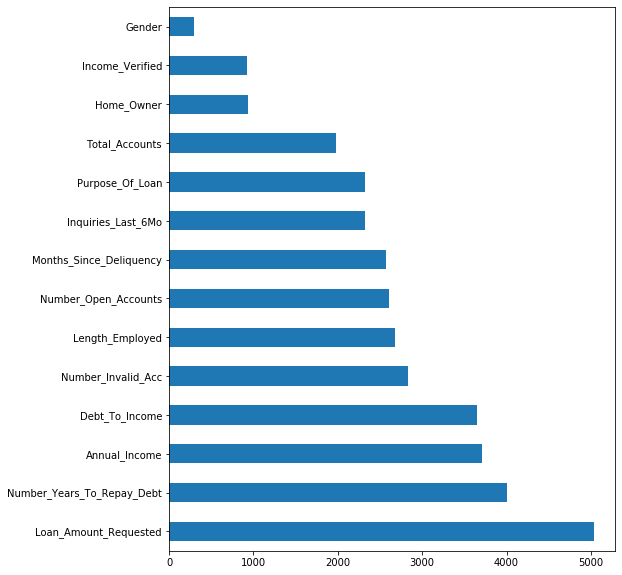

In [0]:
feat_imp = pd.Series(model.feature_importances_, index=df_train.drop(["Interest_Rate"], axis=1).columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

In [0]:
preds = list()
cb_weight=0.4 # Catboost
lb_weight=0.6 # LGBM
for i, j in zip(preds3, preds2):
    xx = [(cb_weight * i[0]) + (lb_weight * j[0]),
          (cb_weight * i[1]) + (lb_weight * j[1]),
          (cb_weight * i[2]) + (lb_weight * j[2])]
    preds.append(xx)
print(preds[:10])
preds=np.argmax(preds,axis=1)+1

[[0.18358378744705117, 0.38321060024381626, 0.43320561230913257], [0.46397623756113326, 0.4626245038813324, 0.07339925855753435], [0.14751102565102645, 0.4250606019763549, 0.42742837237261866], [0.19818135555523908, 0.508165961715934, 0.29365268272882694], [0.11326572752167449, 0.4940329534021035, 0.39270131907622197], [0.09858622449867255, 0.41831583352303925, 0.48309794197828815], [0.07784398497296297, 0.32703945118543387, 0.5951165638416032], [0.027487003042196066, 0.12530822259075874, 0.8472047743670452], [0.06093929473128182, 0.2978484739729036, 0.6412122312958145], [0.06062982623686017, 0.31446767168816714, 0.6249025020749728]]


In [0]:
df_submit = pd.DataFrame({'Loan_ID': loan_ids, 'Interest_Rate': preds}) # Ensemble submission
df_submit.to_csv("submit1.csv", index=False)